In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [6]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data.data.shape

(569, 30)

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

N, D = X_train.shape

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(D,)), 
                             tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.binary_crossentropy, 
              metrics=["accuracy"])

r = model.fit(x=X_train, y=y_train,             
              epochs=100, validation_data=(X_test, y_test))

print(f"train score: {model.evaluate(x=X_train, y=y_train)}")
print(f"test score: {model.evaluate(x=X_test, y=y_test)}")

Epoch 1/100
12/12 [==============================] - 2s 34ms/step - loss: 0.6642 - accuracy: 0.6289 - val_loss: 0.6351 - val_accuracy: 0.6436
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6034 - accuracy: 0.6799 - val_loss: 0.5868 - val_accuracy: 0.7181
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5773 - accuracy: 0.7362 - val_loss: 0.5456 - val_accuracy: 0.7394
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4989 - accuracy: 0.7552 - val_loss: 0.5099 - val_accuracy: 0.7926
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4825 - accuracy: 0.7877 - val_loss: 0.4800 - val_accuracy: 0.8138
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4574 - accuracy: 0.8545 - val_loss: 0.4540 - val_accuracy: 0.8298
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4048 - accuracy: 0.8424 - val_loss: 0.4314 - val_accuracy: 0.8457
Epoch 8/100


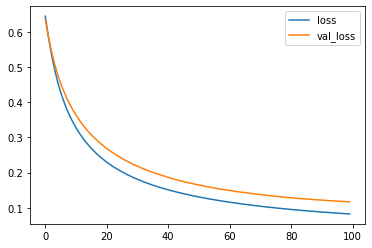

In [14]:
import matplotlib.pyplot as plt

plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

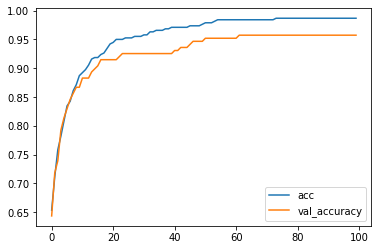

In [15]:
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [16]:
P = model.predict(X_test)
print(P)

[[9.80845213e-01]
 [8.80220458e-02]
 [9.97949779e-01]
 [9.57869887e-01]
 [6.36735320e-01]
 [8.36783290e-01]
 [4.64232236e-01]
 [1.79067925e-02]
 [9.99922395e-01]
 [9.03343141e-01]
 [1.55718729e-01]
 [9.87434924e-01]
 [9.95137036e-01]
 [3.83351278e-03]
 [9.98694718e-01]
 [8.07634182e-03]
 [6.48957794e-04]
 [9.86494660e-01]
 [9.98379946e-01]
 [9.23370719e-01]
 [9.41791952e-01]
 [8.37085009e-01]
 [5.85134607e-04]
 [9.87642884e-01]
 [7.36982286e-01]
 [9.99192178e-01]
 [1.01009209e-03]
 [8.23910356e-01]
 [9.99223113e-01]
 [9.86086249e-01]
 [9.72888350e-01]
 [9.95355129e-01]
 [9.96107996e-01]
 [9.15746093e-01]
 [9.52030599e-01]
 [6.38063401e-02]
 [4.06516541e-04]
 [9.91718054e-01]
 [4.88353334e-02]
 [5.94630319e-06]
 [8.84850204e-01]
 [2.63480842e-02]
 [2.40173231e-05]
 [9.81283844e-01]
 [9.83329594e-01]
 [9.98345256e-01]
 [6.74466267e-02]
 [9.99973059e-01]
 [9.97178197e-01]
 [7.53038785e-06]
 [2.50221826e-02]
 [9.89548206e-01]
 [9.64293957e-01]
 [6.27887845e-01]
 [9.73878682e-01]
 [9.922177

In [21]:
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1.]


In [26]:
print("Manually calculated accuracy: ", np.mean(P == y_test))
print("Evaluate output: ", model.evaluate(x=X_test, y=y_test))

Manually calculated accuracy:  0.9574468085106383
6/6 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9574
Evaluate output:  [0.11656562983989716, 0.957446813583374]
